In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from feature_engine.imputation import RandomSampleImputer
from sklearn.impute import KNNImputer

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsVariancebaseline          14
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsContrastbaseline          18
HipsClusterShadebaseline      18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

In [4]:
dataset.drop(columns=["RID", "Gender", "Ageatscreening"], axis=1, inplace=True)
len(dataset.columns)

21

In [28]:
rem_na_dataset = dataset.copy()
rem_na_dataset.dropna(inplace=True)

X_train_null, X_test_null, y_train_null, y_test_null = train_test_split(rem_na_dataset.drop("Diagnosis", axis=1),
                                                                        rem_na_dataset["Diagnosis"],
                                                                        test_size=0.3,
                                                                        random_state=42,
)

X_train_null.shape, X_test_null.shape, y_train_null.shape, y_test_null.shape

((311, 20), (134, 20), (311,), (134,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_train_copy = X_train.copy()
X_test_copy = X_train.copy()

X_train.shape, X_test.shape

((425, 20), (183, 20))

In [7]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=10),
    max_iter=10,
    random_state=0)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
    max_iter=10,
    random_state=0)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0)

imputer_random_sample  = RandomSampleImputer(random_state=42)

imputer_knn_imp = KNNImputer(
    n_neighbors=10,
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)

In [8]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

imputer_random_sample.fit(X_train)

imputer_knn_imp.fit(X_train)

c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


KNNImputer(n_neighbors=10, weights='distance')

In [9]:
# replace NA
X_train_bayes = imputer_bayes.transform(X_train)
X_test_bayes = imputer_bayes.transform(X_test)

X_train_knn = imputer_knn.transform(X_train)
X_test_knn = imputer_knn.transform(X_test)

X_train_nonLin = imputer_nonLin.transform(X_train)
X_test_nonLin = imputer_nonLin.transform(X_test)

X_train_missForest = imputer_missForest.transform(X_train)
X_test_missForest = imputer_missForest.transform(X_test)

X_train_rs = imputer_random_sample.transform(X_train)
X_test_rs = imputer_random_sample.transform(X_test)

X_train_knnimp = imputer_knn_imp.transform(X_train)
X_test_knnimp = imputer_knn_imp.transform(X_test)

In [10]:
X_train_bayes_t = pd.DataFrame(X_train_bayes, columns=X_train.columns)
X_test_bayes_t = pd.DataFrame(X_test_bayes, columns=X_test.columns)

X_train_knn_t = pd.DataFrame(X_train_knn, columns=X_train.columns)
X_test_knn_t = pd.DataFrame(X_test_knn, columns=X_test.columns)

X_train_nonLin_t = pd.DataFrame(X_train_nonLin, columns=X_train.columns)
X_test_nonLin_t = pd.DataFrame(X_test_nonLin, columns=X_test.columns)

X_train_missForest_t = pd.DataFrame(X_train_missForest, columns=X_train.columns)
X_test_missForest_t = pd.DataFrame(X_test_missForest, columns=X_test.columns)

X_train_rs_t = pd.DataFrame(X_train_rs, columns=X_train.columns)
X_test_rs_t = pd.DataFrame(X_test_rs, columns=X_test.columns)

X_train_knnimp_t = pd.DataFrame(X_train_knnimp, columns=X_train.columns)
X_test_knnimp_t = pd.DataFrame(X_test_knnimp, columns=X_test.columns)

In [11]:
dataframes = [
    X_train_bayes_t, X_test_bayes_t, 
    X_train_knn_t, X_test_knn_t,
    X_train_nonLin_t, X_test_nonLin_t,
    X_train_missForest_t, X_test_missForest_t,
    X_train_rs_t, X_test_rs_t,
    X_train_knnimp_t, X_test_knnimp_t,
    X_train_null, X_test_null
]

for df in dataframes:
    if df.isna().any().all() == False:
        print("No missing values in any dataframe")
        break
    else:
        print("Still missing values")

No missing values in any dataframe


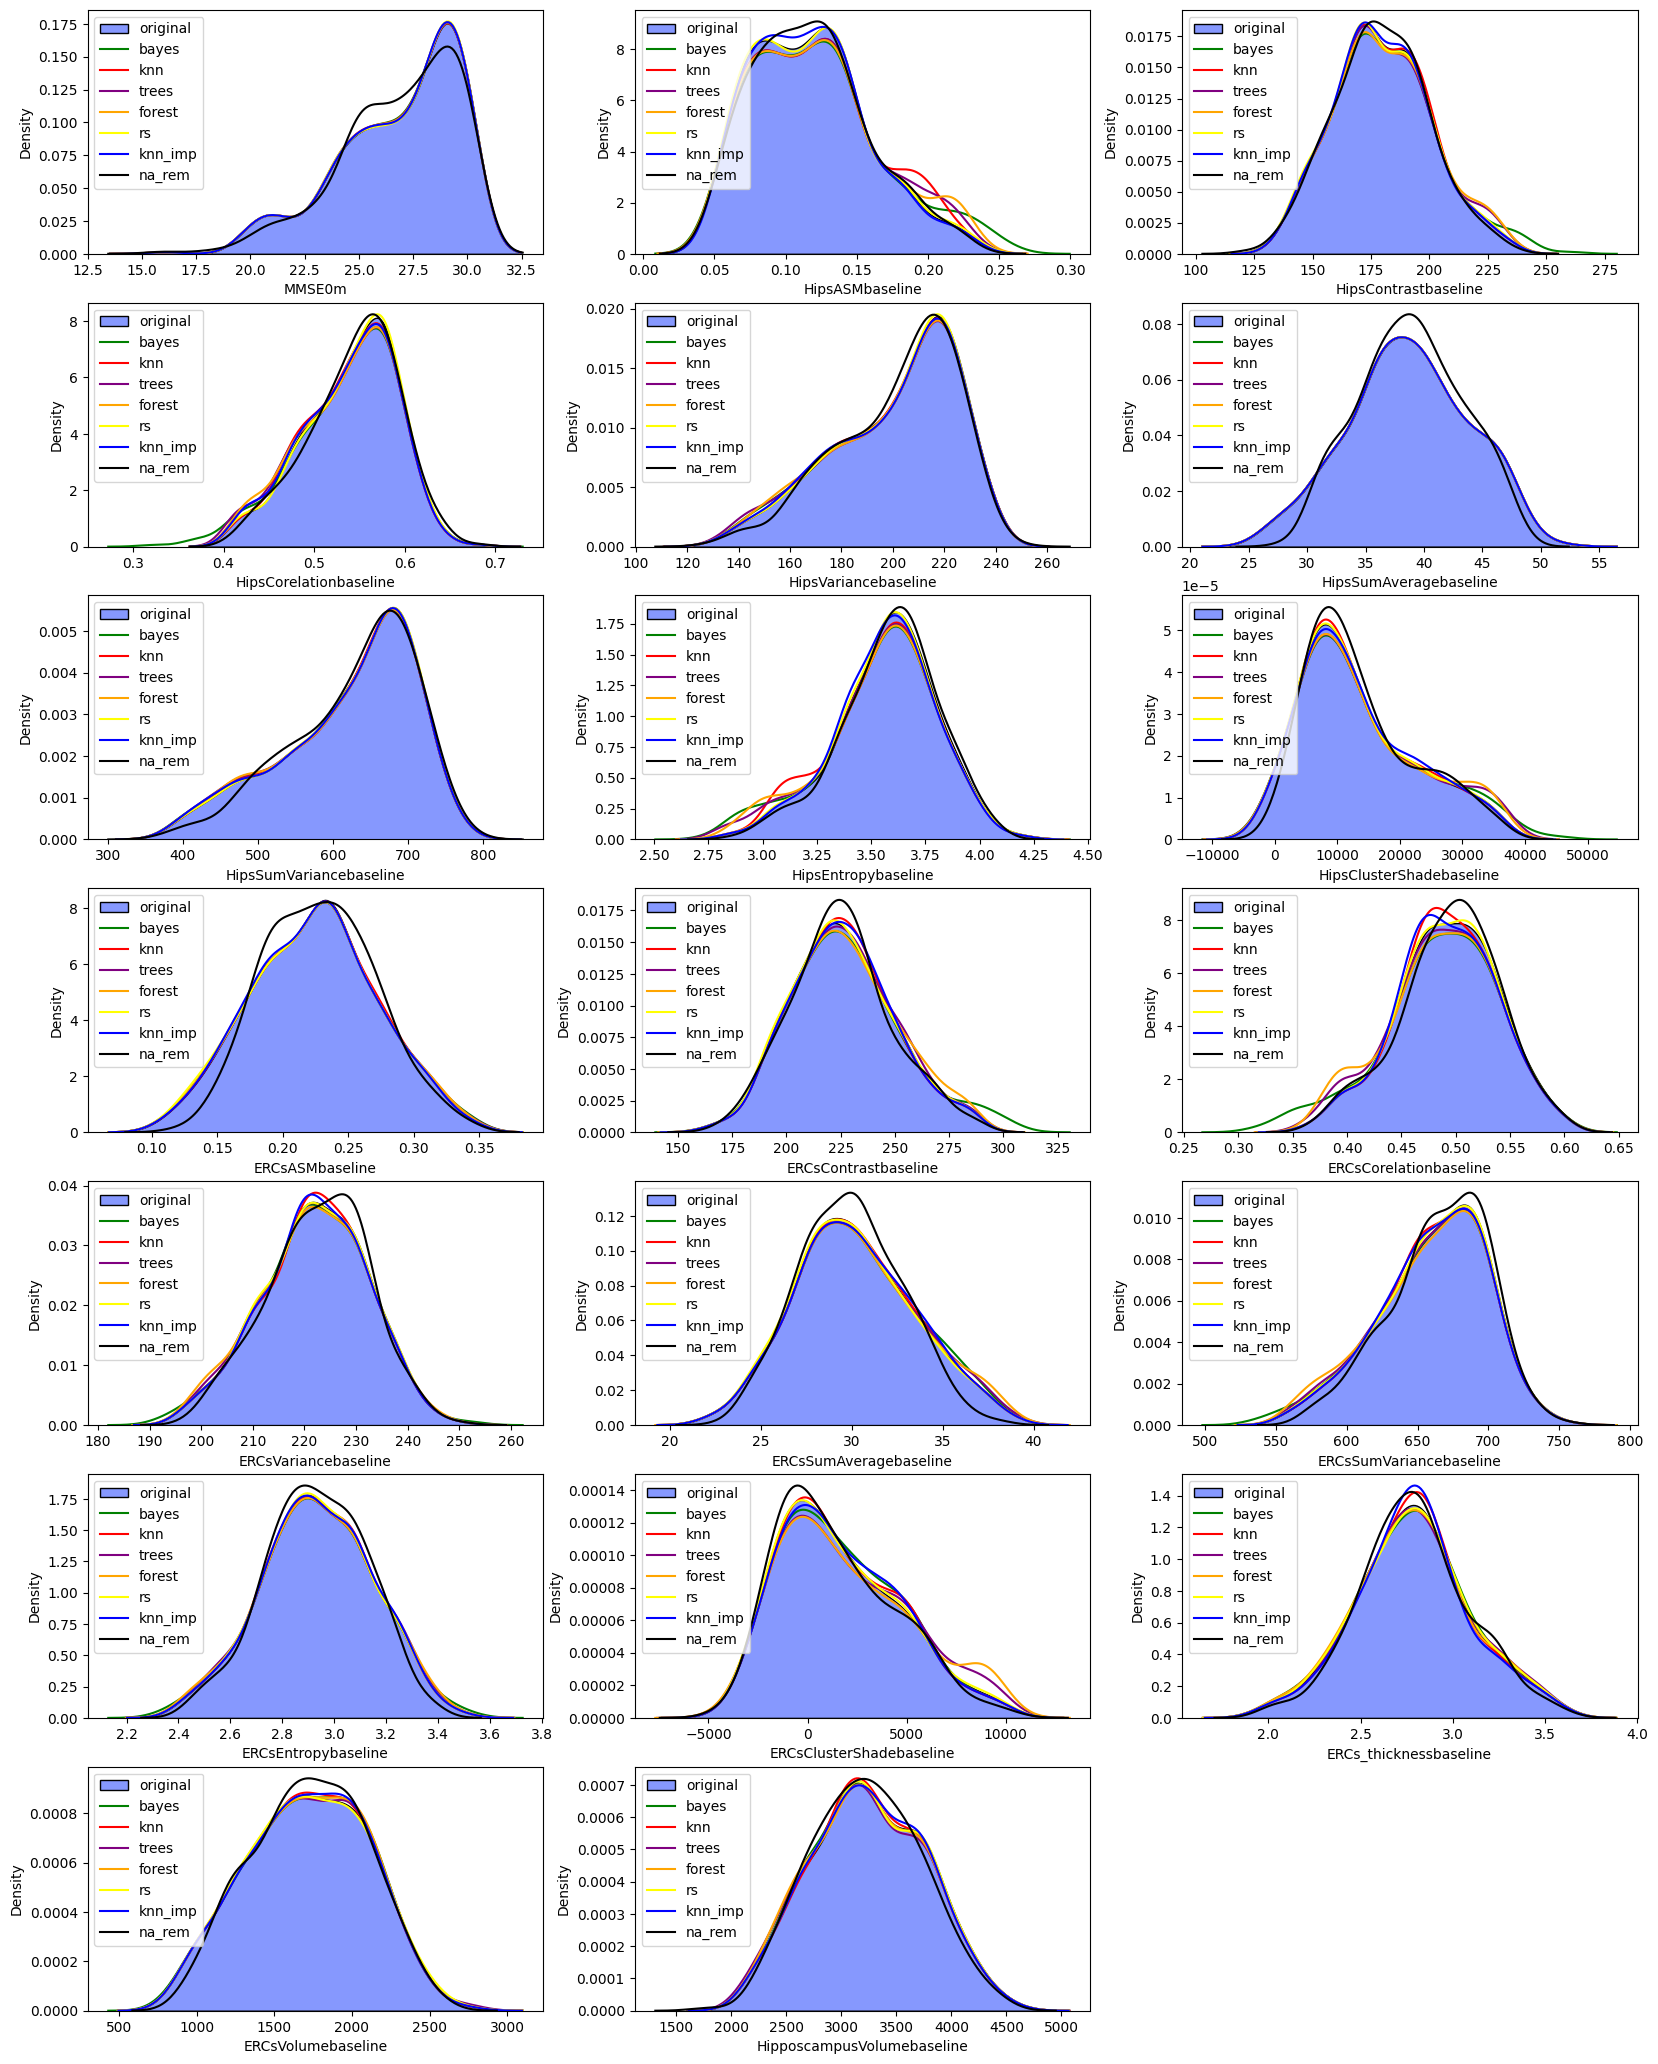

In [12]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_bayes_t[X_train_bayes_t.columns[i]], color= "green")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_knn_t[X_train_knn_t.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_nonLin_t[X_train_nonLin_t.columns[i]], color= "purple")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_missForest_t[X_train_missForest_t.columns[i]], color= "orange")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_rs_t[X_train_rs_t.columns[i]], color= "yellow")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_knnimp_t[X_train_knnimp_t.columns[i]], color= "blue")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_null[X_train_null.columns[i]], color= "black")
    
    labels = ['original', 'bayes', 'knn', 'trees', 'forest', 'rs', 'knn_imp', 'na_rem']
    plt.legend(labels, loc='upper left')

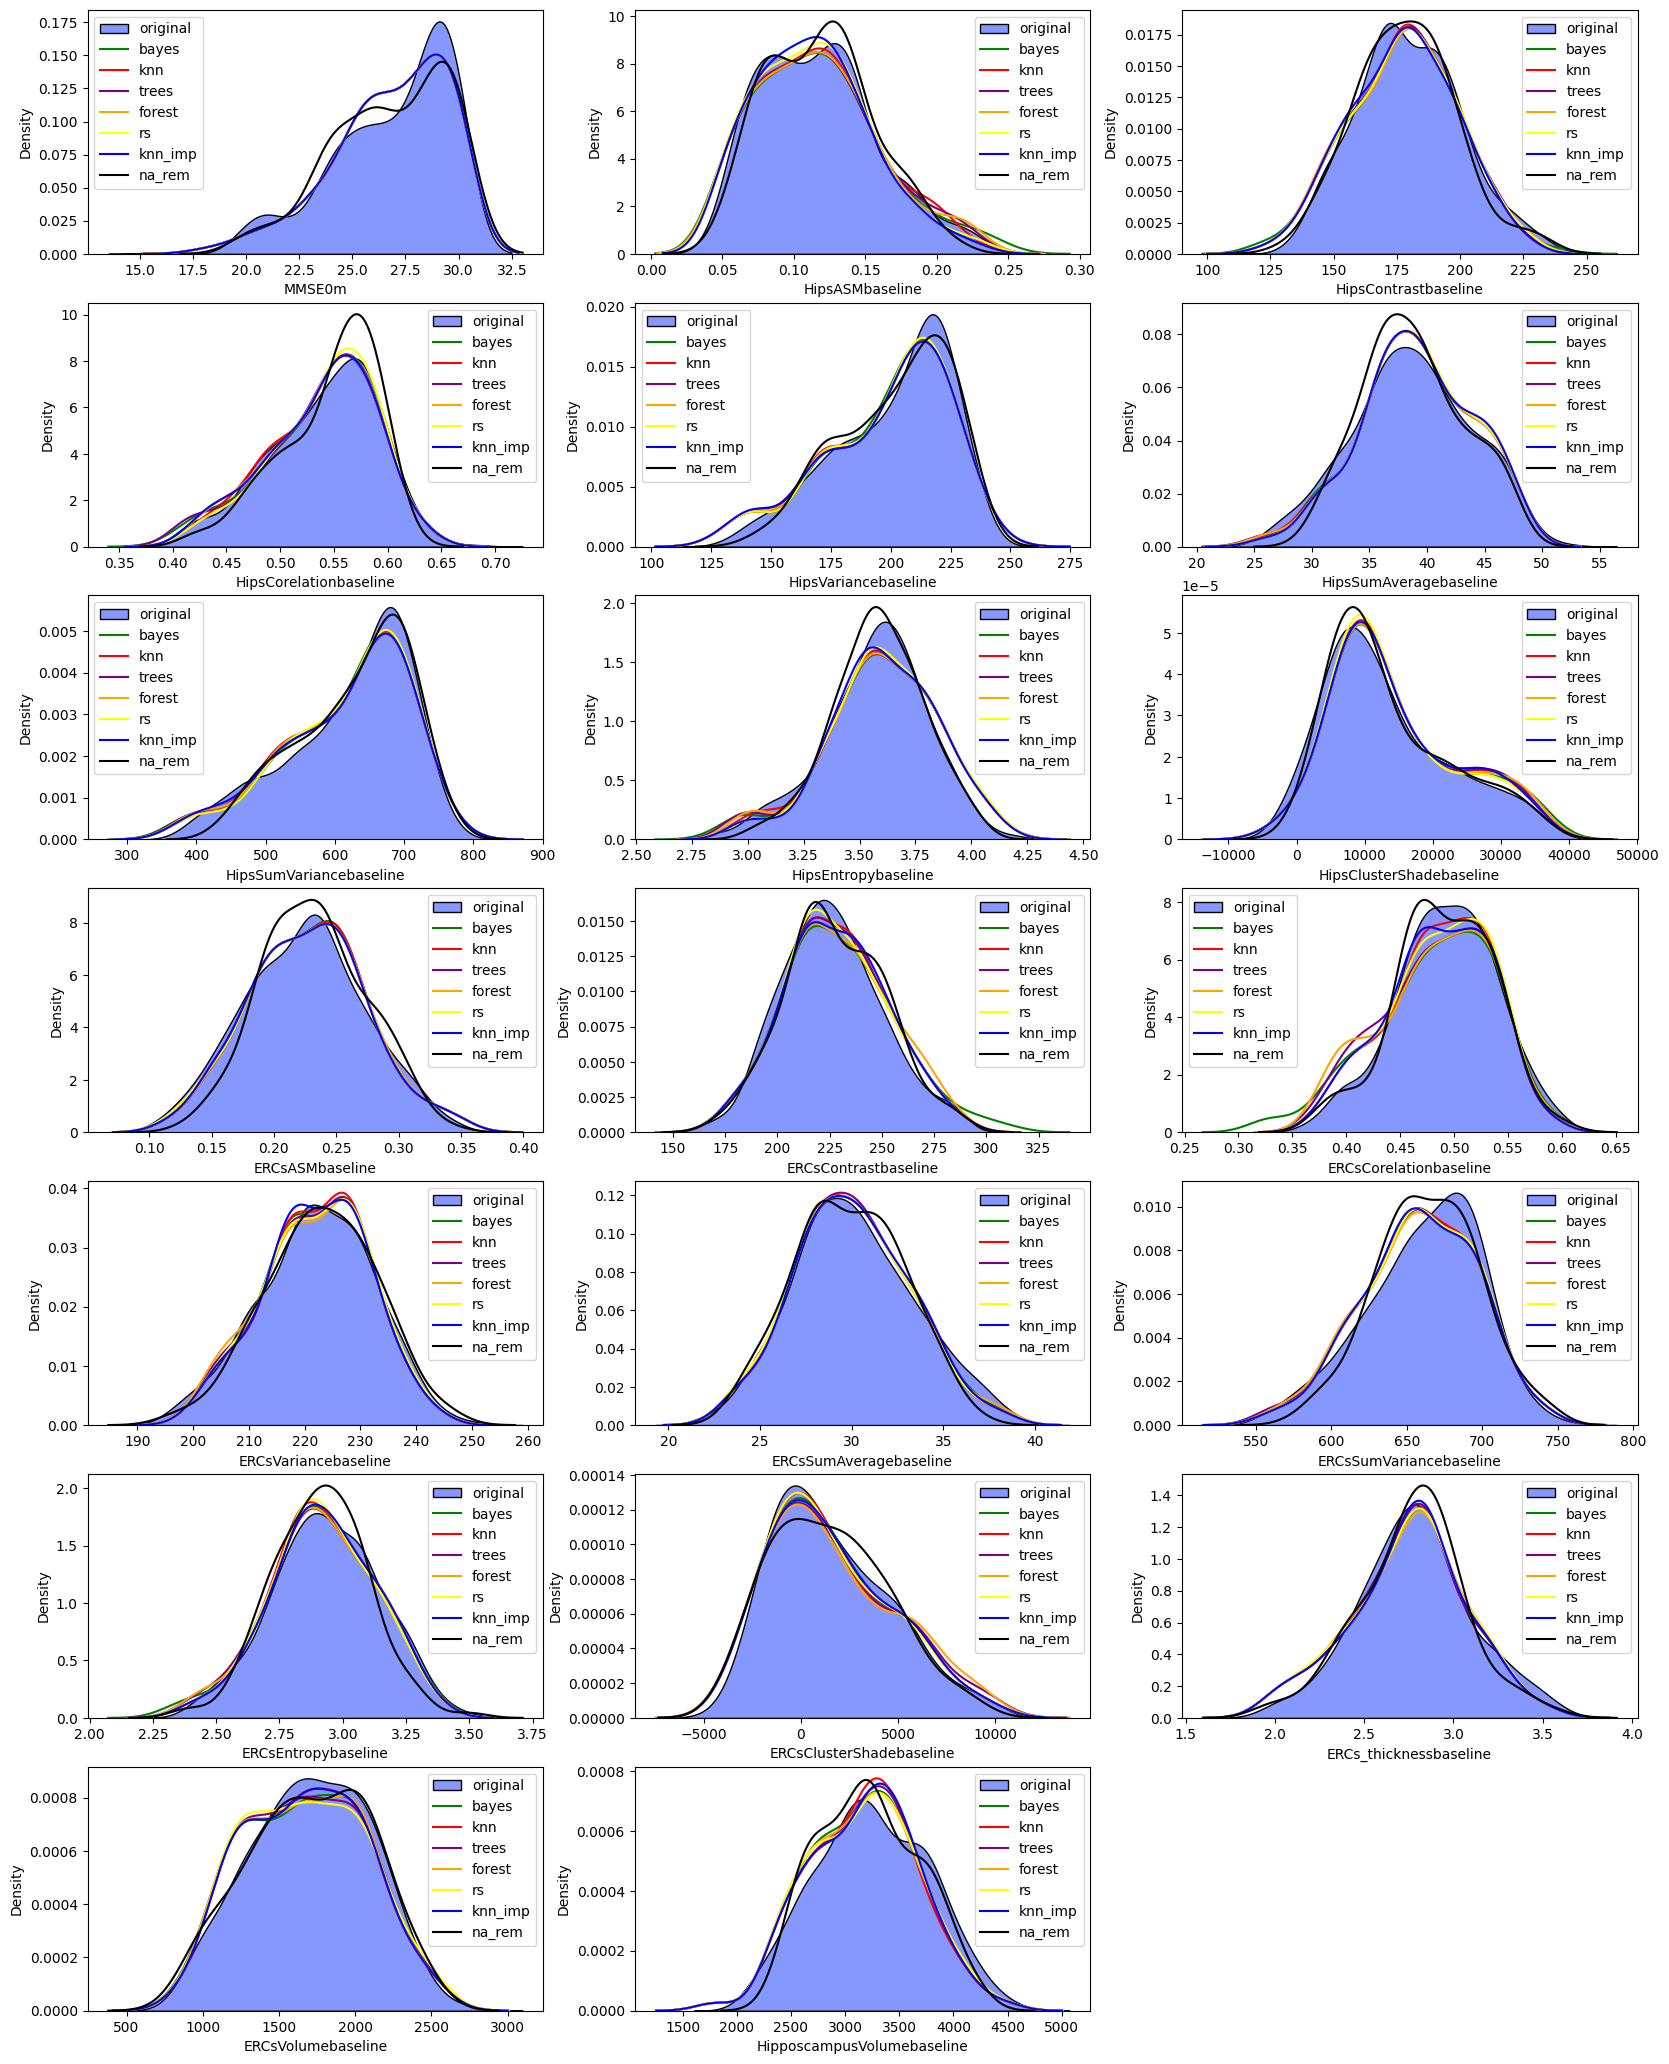

In [13]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_bayes_t[X_test_bayes_t.columns[i]], color= "green")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_knn_t[X_test_knn_t.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_nonLin_t[X_test_nonLin_t.columns[i]], color= "purple")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_missForest_t[X_test_missForest_t.columns[i]], color= "orange")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_rs_t[X_test_rs_t.columns[i]], color= "yellow")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_knnimp_t[X_test_knnimp_t.columns[i]], color= "blue")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_null[X_test_null.columns[i]], color= "black")
    
    labels = ['original', 'bayes', 'knn', 'trees', 'forest', 'rs', 'knn_imp', 'na_rem']
    plt.legend(labels, loc='best')

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

def run_random_forest(X_train, X_test, y_train, y_test):
    try:
        
        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=4,
                                    random_state=42,
                                    class_weight="balanced",
        )
        
        # Fit the model
        rf.fit(X_train, y_train)
        
        # Get predicted probabilities for ROC AUC
        pred_train_proba = rf.predict_proba(X_train)
        pred_test_proba = rf.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train_norm = rf.predict(X_train)
        pred_test_norm = rf.predict(X_test)
        

        # Calculate ROC-AUC
        roc_score_train = roc_auc_score(y_train, 
                                        pred_train_proba, 
                                        average="weighted", 
                                        multi_class="ovr",
        )
        roc_score_test = roc_auc_score(y_test,
                                    pred_test_proba,  
                                    average="weighted", 
                                    multi_class="ovr",
        )
        
        # Calculate accuracies
        accuracy_train = accuracy_score(y_train, pred_train_norm)
        accuracy_test = accuracy_score(y_test, pred_test_norm)
        
        # Print results
        print(f"Train ROC-AUC: {roc_score_train}")
        print(f"Train Accuracy: {accuracy_train}")
        print(f"Test ROC-AUC: {roc_score_test}")
        print(f"Test Accuracy: {accuracy_test}")
    
    except Exception as e:
        print(f"Error has occured {e}")
        

In [ ]:
dataframes = [
    (X_train_bayes_t, X_test_bayes_t), 
    (X_train_knn_t, X_test_knn_t),
    (X_train_nonLin_t, X_test_nonLin_t),
    (X_train_missForest_t, X_test_missForest_t),
    (X_train_rs_t, X_test_rs_t),
    (X_train_knnimp_t, X_test_knnimp_t),   
]

imputer_methods = ["Bayes", "KNNReg", "nonLin", "missForest", "random sample", "KNN", "null"]

for i, ((x_train, x_test), imputer_methods) in enumerate(zip(dataframes, imputer_methods)):
    print(f"Running random forest for dataset pair {i} with method {imputer_methods}: ")
    run_random_forest(x_train, x_test, y_train, y_test)
    print("\n")

Running random forest for dataset pair 0 with method Bayes: 
Train ROC-AUC: 0.9387733689126863
Train Accuracy: 0.7905882352941176
Test ROC-AUC: 0.7995352339359186
Test Accuracy: 0.5136612021857924


Running random forest for dataset pair 1 with method KNNReg: 
Train ROC-AUC: 0.9421409885403752
Train Accuracy: 0.7929411764705883
Test ROC-AUC: 0.7949847064556459
Test Accuracy: 0.5191256830601093


Running random forest for dataset pair 2 with method nonLin: 
Train ROC-AUC: 0.940222169613529
Train Accuracy: 0.7952941176470588
Test ROC-AUC: 0.7952047210390815
Test Accuracy: 0.5191256830601093


Running random forest for dataset pair 3 with method missForest: 
Train ROC-AUC: 0.9428232786041142
Train Accuracy: 0.7952941176470588
Test ROC-AUC: 0.8015934529110911
Test Accuracy: 0.5191256830601093


Running random forest for dataset pair 4 with method random sample: 
Train ROC-AUC: 0.9355551315004643
Train Accuracy: 0.7811764705882352
Test ROC-AUC: 0.7881947596044233
Test Accuracy: 0.5027322404

In [30]:
run_random_forest(X_train_null, X_test_null, y_train_null, y_test_null)

Train ROC-AUC: 0.9521318512459898
Train Accuracy: 0.8135048231511254
Test ROC-AUC: 0.7463117183492306
Test Accuracy: 0.47761194029850745
